## Fuel  Year to  Year  Transition Analysis

The purpose of this analysis is to see how the fuel  in Escondido changes from year to year.

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
def ImportXYZ(FileName,labelName):
    DF=pd.read_table(FileName, header=None)
    DF.columns=['Row']
    DF["Eastern"]=DF["Row"].apply(lambda x: float(x.split(" ")[0]))
    DF["Northern"]=DF["Row"].apply(lambda x: float(x.split(" ")[1]))
    DF[labelName]=DF["Row"].apply(lambda x: x.split(" ")[2])
    del DF["Row"]
    return DF

In [3]:
clip='WIFIRE/Data_Prep_Work_Flow/Clipped_Files/'

#Import Fuel
Fuel2010=ImportXYZ(clip+'Fuel2010_Escondido_UTM.xyz','Fuel2010')
Fuel2012=ImportXYZ(clip+'Fuel2012_Escondido_UTM.xyz','Fuel2012')
Fuel2014=ImportXYZ(clip+'Fuel2014_Escondido_UTM.xyz','Fuel2014')

#Combine Fuel data
Fuel=pd.merge(pd.merge(Fuel2010,Fuel2012,on=['Eastern','Northern']),Fuel2014,on=['Eastern','Northern'])

print(Fuel2010.shape)
print(Fuel2012.shape)
print(Fuel2014.shape)
print(Fuel.shape)

Fuel.head()

(154671, 3)
(154671, 3)
(154671, 3)
(154671, 5)


,Eastern,Northern,Fuel2010,Fuel2012,Fuel2014
0,480802.714908,3.667607e+06,5,1,5
1,480832.704725,3.667607e+06,1,1,1
2,480862.694541,3.667607e+06,91,91,91
3,480892.684358,3.667607e+06,91,91,91
4,480922.674174,3.667607e+06,91,91,2


In [4]:
Hold=[]
for index, row in Fuel.iterrows():
    if row["Fuel2010"]!=row["Fuel2012"]:
        a=(row["Fuel2010"],row["Fuel2012"])
        d=1
    else:
        a=np.nan
        d=0
    if row["Fuel2012"]!=row["Fuel2014"]:
        b=(row["Fuel2012"],row["Fuel2014"])
        d+=1
    else:
        b=np.nan
        d+=0
    if d>0 :
        c=(row["Fuel2010"],row["Fuel2012"],row["Fuel2014"])
    else:
        c=np.nan
    Hold.append([a,b,c])
    
H=pd.DataFrame(Hold, columns=["Tran10-12","Tran12-14","Tran10-12-14"])

In [5]:
print (Fuel.shape)
Fuel=pd.concat([Fuel,H],axis=1)
print (Fuel.shape)

(154671, 5)
(154671, 8)


In [6]:
# What percentage did NOT change?
print ("2010 to 2012: ",Fuel[Fuel["Tran10-12"].isnull()].shape[0]/Fuel.shape[0])
print ("2012 to 2014: ",Fuel[Fuel["Tran12-14"].isnull()].shape[0]/Fuel.shape[0])
print ("2010 to 2012 to 2014: ",Fuel[Fuel["Tran10-12-14"].isnull()].shape[0]/Fuel.shape[0])

2010 to 2012:  0.9554667649397754
2012 to 2014:  0.7661940505977203
2010 to 2012 to 2014:  0.7621208888544071


In [7]:
#What percentage changed back?
def RevertBack(t):
    if isinstance(t,tuple):
        if t[0]==t[2]:
            return t[0]
        else:
            return np.nan
    else:
        return np.nan
Fuel["Reverted"]=Fuel['Tran10-12-14'].apply(lambda x: RevertBack(x))
print("Changed from 2010 to 2012, then Changed Back 2014:",Fuel[Fuel["Reverted"].isnull()==False].shape[0]/Fuel.shape[0])

Changed from 2010 to 2012, then Changed Back 2014: 0.034518429440554464


In [8]:
Revert=Fuel.groupby(["Reverted","Fuel2012"])["Eastern"].count().reset_index()
Revert.columns=["Fuel2010&2014","Fuel2012","Count"]
Revert.head()

,Fuel2010&2014,Fuel2012,Count
0,1,2,363
1,1,5,241
2,1,8,31
3,1,9,48
4,1,91,404


In [9]:
#Import Fuel "decoder ring"
DecodeFuel=pd.read_csv('WIFIRE/Data_labels/fuel_labels.csv')
DecodeFuel.columns=["filename",'id','fuelLabel']
DecodeFuel["id"]=DecodeFuel["id"].apply(lambda x: str(x))
DecodeFuel

,filename,id,fuelLabel
0,FBFM1,1,Short Grass
1,FBFM2,2,Timber Grass
2,FBFM3,3,Tall Grass
3,FBFM4,4,Chaparral
4,FBFM5,5,Brush
5,FBFM6,6,Dormant Brush
6,FBFM7,7,Southern Rough
7,FBFM8,8,Compact Timber Litter
8,FBFM9,9,Hardwood Litter
9,FBFM10,10,Timber Understory


In [10]:
Revert=pd.merge(pd.merge(Revert,DecodeFuel[["id","fuelLabel"]],left_on="Fuel2010&2014",right_on="id",how='inner'),DecodeFuel[["id","fuelLabel"]],left_on='Fuel2012',right_on='id',how='inner')
Revert.columns=["Fuel2010&2014","Fuel2012","Count","id_x","Label10&14","id_y","Label12"]
#Revert[["Fuel2010&2014","Fuel2012","Count","Label10&14","Label12"]].to_csv('RevertedFuel.csv',index=False)
Revert.head()

,Fuel2010&2014,Fuel2012,Count,id_x,Label10&14,id_y,Label12
0,1,2,363,1,Short Grass,2,Timber Grass
1,5,2,351,5,Brush,2,Timber Grass
2,8,2,147,8,Compact Timber Litter,2,Timber Grass
3,9,2,57,9,Hardwood Litter,2,Timber Grass
4,91,2,364,91,Urban,2,Timber Grass


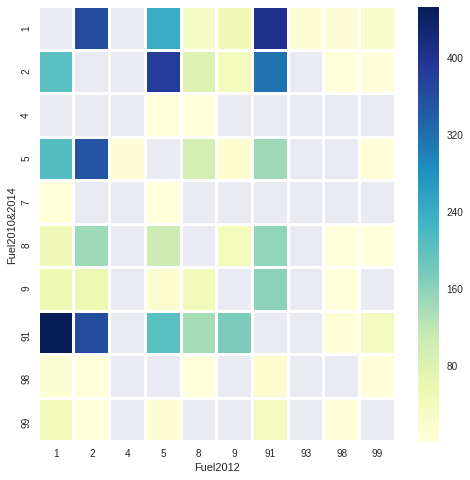

In [44]:
plt.figure(figsize=(8,8))
crosstab = pd.crosstab(Revert["Fuel2010&2014"], Revert["Fuel2012"], values=Revert["Count"], aggfunc=np.sum)
ax = sns.heatmap(crosstab,  linewidths=2, cmap="YlGnBu")

These "Reverted" fuel labels are potential mislabels.  I sent them to CSV so that we can discuss with advisors.  At first look,  I would guess those  labels  in 2010 & 2014 that were Water but something else in 2012 were mislabelled in 2012

Now let's look at the individual changes from  2010 to 2012 and 2012 to 2014

In [67]:
#Look at those that changed & didn't change back
T10_12=Fuel[(Fuel["Tran10-12"].isnull()==False)&(Fuel["Reverted"].isnull())].groupby(["Fuel2010","Fuel2012"])["Eastern"].count().rename('Count_Pixel').reset_index()
T12_14=Fuel[(Fuel["Tran12-14"].isnull()==False)&(Fuel["Reverted"].isnull())].groupby(["Fuel2012","Fuel2014"])["Eastern"].count().rename('Count_Pixel').reset_index()


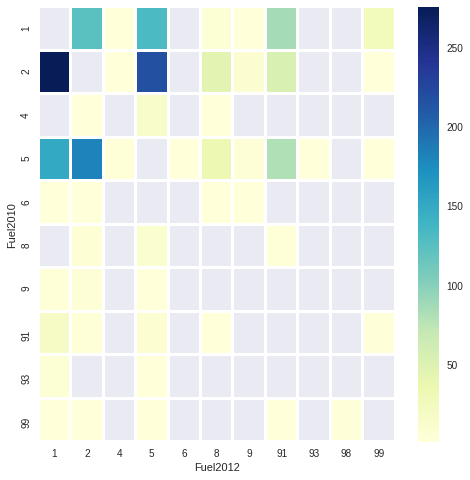

In [47]:
plt.figure(figsize=(8,8))
crosstab10_12 = pd.crosstab(T10_12["Fuel2010"], T10_12["Fuel2012"], values=T10_12["Count_Pixel"], aggfunc=np.sum)
ax = sns.heatmap(crosstab10_12,  linewidths=2, cmap="YlGnBu")

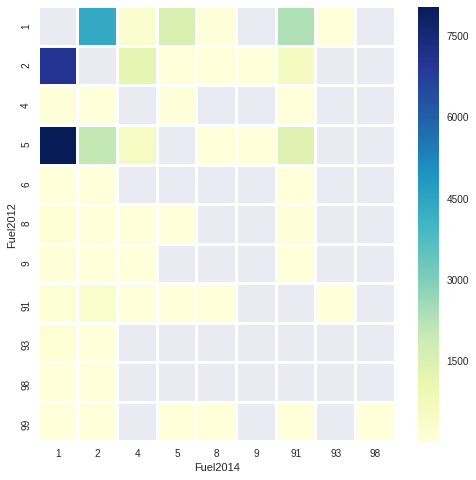

In [52]:
plt.figure(figsize=(8,8))
crosstab12_14 = pd.crosstab(T12_14["Fuel2012"], T12_14["Fuel2014"], values=T12_14["Count_Pixel"], aggfunc=np.sum)
ax = sns.heatmap(crosstab12_14,  linewidths=2, cmap="YlGnBu")

In [70]:
t1012=pd.merge(pd.merge(T10_12,DecodeFuel,left_on='Fuel2010',right_on='id'),DecodeFuel,left_on='Fuel2012',right_on='id')
t1012=t1012[["Fuel2010","Fuel2012","Count_Pixel","fuelLabel_x","fuelLabel_y"]]
t1012.columns=["Fuel2010","Fuel2012","Count","Label2010","Label2012"]


t1214=pd.merge(pd.merge(T12_14,DecodeFuel,left_on='Fuel2012',right_on='id'),DecodeFuel,left_on='Fuel2014',right_on='id')
t1214=t1214[["Fuel2012","Fuel2014","Count_Pixel","fuelLabel_x","fuelLabel_y"]]
t1214.columns=["Fuel2012","Fuel2014","Count","Label2012","Label2014"]


t1012.to_csv("Changed_From2010_To2012.csv")
t1214.to_csv("Changed_From2012_To2014.csv")

Sent the  data to a CSV file for  collaboration with  Advisors

In [56]:
#How many changed both times without reverting?
def RevertBack(t):
    if isinstance(t,tuple):
        if t[0]!=t[2] and t[0]!=t[1] and t[1]!=t[2]:
            return True
        else:
            return False
    else:
        return False
Fuel["AllYears"]=Fuel['Tran10-12-14'].apply(lambda x: RevertBack(x))

print("Changed all Years: ",Fuel[Fuel["AllYears"]==True].shape[0])

Changed all Years:  919


In [66]:
AllYears=Fuel[Fuel["AllYears"]==True].groupby(["Fuel2010","Fuel2012","Fuel2014"])["AllYears"].count().rename('Count').reset_index()

A=pd.merge(pd.merge(pd.merge(AllYears,DecodeFuel[["id","fuelLabel"]],left_on='Fuel2010',right_on="id"),DecodeFuel[["id","fuelLabel"]],left_on='Fuel2012',right_on="id"),DecodeFuel[["id","fuelLabel"]],left_on='Fuel2014',right_on="id")
AY=A[["Fuel2010","Fuel2012","Fuel2014","Count","fuelLabel_x","fuelLabel_y","fuelLabel"]]
AY.columns=["Fuel2010","Fuel2012","Fuel2014","Count","Label2010","Label2012","Label2014"]

AY.to_csv("AllYears.csv")
AY.head()


,Fuel2010,Fuel2012,Fuel2014,Count,Label2010,Label2012,Label2014
0,1,2,4,3,Short Grass,Timber Grass,Chaparral
1,5,2,4,6,Brush,Timber Grass,Chaparral
2,1,5,4,7,Short Grass,Brush,Chaparral
3,2,5,4,58,Timber Grass,Brush,Chaparral
4,2,8,4,7,Timber Grass,Compact Timber Litter,Chaparral


In [50]:
import networkx as nx
G = nx.Graph()
for index, row in Fuel[Fuel["Fuel2010"]=='91'].iterrows():
    a="2010_"+row["Fuel2010"]
    b="2012_"+row["Fuel2012"]
    c="2014_"+row["Fuel2014"]
    if (a,b) in G.edges():
        G[a][b]["weight"]+=1
    else:
        G.add_edge(a,b,weight=1)
    if (b,c) in G.edges():
        G[b][c]["weight"]+=1
    else:
        G.add_edge(b,c,weight=1)


In [52]:
G.edges()

[('2012_2', '2014_91'),
 ('2012_2', '2014_1'),
 ('2012_2', '2014_2'),
 ('2012_2', '2010_91'),
 ('2012_9', '2014_91'),
 ('2012_9', '2010_91'),
 ('2012_8', '2014_91'),
 ('2012_8', '2014_1'),
 ('2012_8', '2014_2'),
 ('2012_8', '2010_91'),
 ('2012_5', '2014_91'),
 ('2012_5', '2014_1'),
 ('2012_5', '2014_2'),
 ('2012_5', '2010_91'),
 ('2012_99', '2014_91'),
 ('2012_99', '2014_2'),
 ('2012_99', '2010_91'),
 ('2014_93', '2012_1'),
 ('2014_93', '2012_91'),
 ('2012_1', '2014_1'),
 ('2012_1', '2014_91'),
 ('2012_1', '2014_2'),
 ('2012_1', '2010_91'),
 ('2010_91', '2012_98'),
 ('2010_91', '2012_91'),
 ('2012_98', '2014_91'),
 ('2014_91', '2012_91'),
 ('2014_1', '2012_91'),
 ('2014_2', '2012_91')]

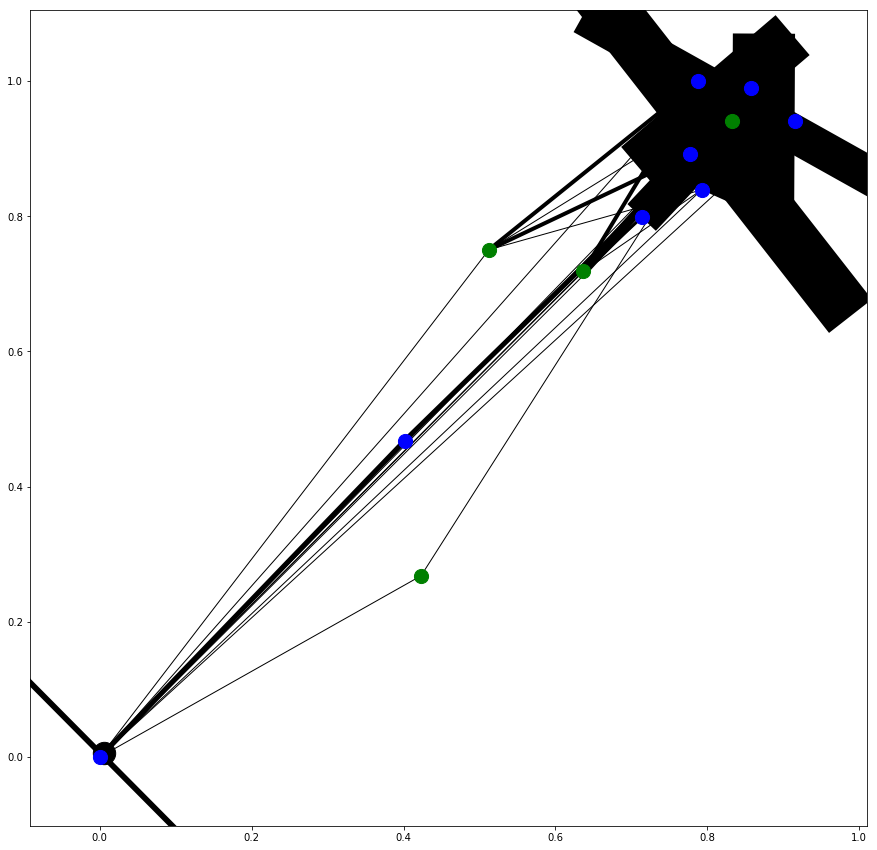

In [60]:
n12=['2012_'+x for x in Fuel[Fuel["Fuel2010"]=='91']["Fuel2012"].unique()]
n14=['2014_'+x for x in Fuel[Fuel["Fuel2010"]=='91']["Fuel2014"].unique()]

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=['2010_91'], node_size=500,node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=n12, node_size=200,node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=n14, node_size=200,node_color='g')
for ed in G.edges():
    nx.draw_networkx_edges(G,pos,edgelist=[ed],width=G[ed[0]][ed[1]]["weight"])
plt.show()